In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data, plot_3d_scatter
from gen_data import normalise_data

In [2]:
# computes the entropy of a tensor
def calc_entropy(x:torch.Tensor):
    '''
    Computes the (Shannon) entropy of a tensor based on its empirical distribution
    '''
    x = x.flatten()
    freq = x.unique(return_counts=True)[1]
    probs = freq/torch.sum(freq)
    return -torch.multiply(probs, torch.log(probs)).sum()

In [3]:
X, Y = load_data('./data/','complex_train.pkl')

In [4]:
# Y: 10000 data points, 50 time steps, 16 dimensions
calc_entropy(Y[:,-1,:])

tensor(6.0674, device='cuda:0')

In [5]:
# for each dimension
for i in range(16):
    print(f'Output dimension {i+1} entropy:', float(calc_entropy(Y[:,:,i])))

Output dimension 1 entropy: -0.0
Output dimension 2 entropy: 0.21693666279315948
Output dimension 3 entropy: 13.088279724121094
Output dimension 4 entropy: 13.109512329101562
Output dimension 5 entropy: 0.5675452947616577
Output dimension 6 entropy: 13.113750457763672
Output dimension 7 entropy: 13.074057579040527
Output dimension 8 entropy: 0.0003569629043340683
Output dimension 9 entropy: 13.088102340698242
Output dimension 10 entropy: 8.087892532348633
Output dimension 11 entropy: -0.0
Output dimension 12 entropy: 0.0002259317261632532
Output dimension 13 entropy: 0.002542015165090561
Output dimension 14 entropy: 4.2608537673950195
Output dimension 15 entropy: 13.111322402954102
Output dimension 16 entropy: 0.33709558844566345


In [6]:
# principal component analysis of output

# standardise data
Z_scored_Y = normalise_data(Y.view(-1,16)) # normalise data
Z_scored_Y = Z_scored_Y.cpu().numpy()

cov = np.cov(Z_scored_Y.T)

# eigendecomposition and sort eigenvalues
eigenvals, eigenvecs = np.linalg.eig(cov)

idx = eigenvals.argsort()[::-1]   
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:,idx].T

pca = Z_scored_Y @ eigenvecs[:3].T

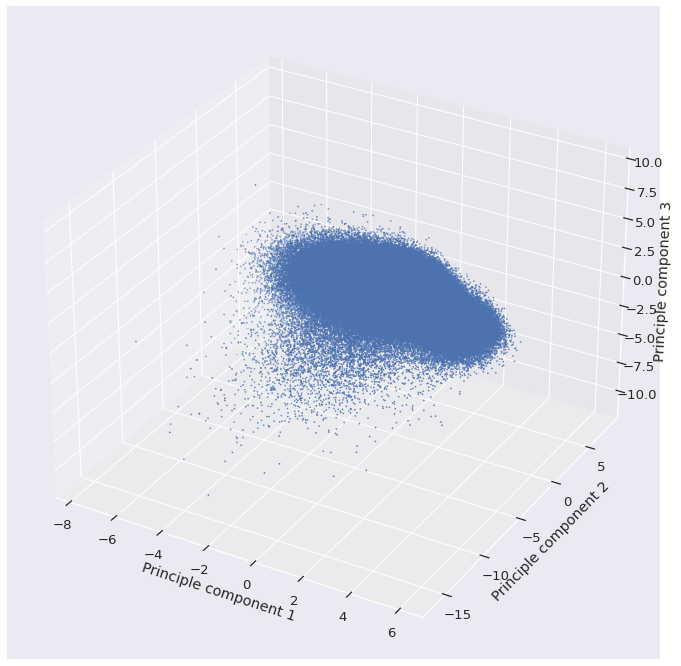

In [7]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca[:,0], pca[:,1], pca[:,2], s=0.5)
ax.set_xlabel('Principle component 1')
ax.set_ylabel('Principle component 2')
ax.set_zlabel('Principle component 3')
plt.show()

Text(0, 0.5, 'PC2')

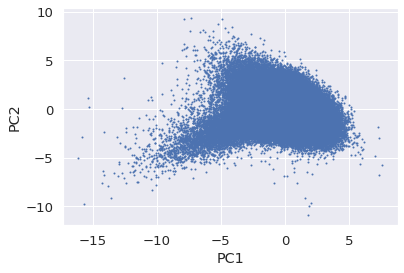

In [8]:
plt.scatter(pca[:,1], pca[:,2], s=1)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [9]:
eigenvals

array([2.34108422, 1.78011826, 1.41308112, 1.09306691, 1.00256389,
       1.00009978, 0.99990022, 0.95461629, 0.90792826, 0.76866931,
       0.65308025, 0.45677098, 0.35662253, 0.27239828, 0.        ,
       0.        ])

In [10]:
np.linalg.eig(cov)[1][:,0]

array([ 0.        ,  0.29979298, -0.22274757, -0.38462481, -0.04281069,
        0.05848809, -0.44857391, -0.00089331, -0.15742542, -0.49945319,
        0.        ,  0.00197991, -0.01977181, -0.06829107,  0.47440615,
       -0.04174353])

In [11]:
eigenvals

array([2.34172686, 1.78043683, 1.41312196, 1.0931566 , 1.00262687,
       1.00006582, 0.99996905, 0.95418931, 0.90751246, 0.76834895,
       0.65286719, 0.4568668 , 0.35658771, 0.27252367, 0.        ,
       0.        ])

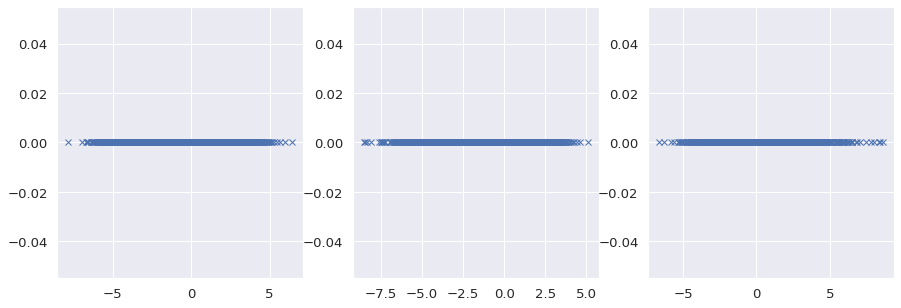

In [13]:
n = len(pca[:,0])
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(pca[:,0], np.zeros(n), 'x')
plt.subplot(132)
plt.plot(pca[:,1], np.zeros(n), 'x')
plt.subplot(133)
plt.plot(pca[:,2], np.zeros(n), 'x')